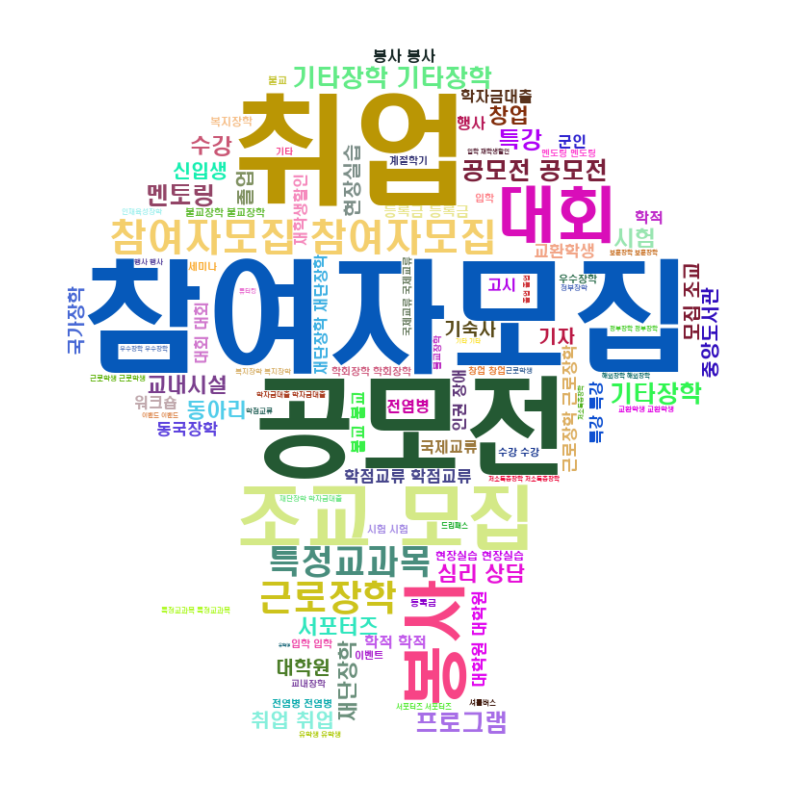

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from matplotlib import font_manager
import random

# CSV 파일 읽기
df = pd.read_csv("./라벨링완료된공지사항.csv")

# 'class' 열 선택 및 결측치 제거
class_column = df['class'].dropna()

# 분류 기준 단어들을 하나의 문자열로 결합
text = ' '.join(class_column)

# 한글 폰트 경로 지정
font_path = 'C:\Windows\Fonts\H2HDRM.TTF'  # 한글 폰트 파일 경로로 수정해야 함

# 마스크 이미지 로드
mask_image = np.array(Image.open('back_mask.jpg'))

# 사용자 정의 색상 함수
def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(random.randint(0, 255) for _ in range(3))

# WordCloud 객체 생성
wordcloud = WordCloud(font_path=font_path, background_color='white', mask=mask_image).generate(text)

# 단어의 색상 설정
wordcloud = wordcloud.recolor(color_func=random_color_func)

# 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
